####Ridge and Lasso Regression Implementation

#### Regularization

Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are much varying.

Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance with the tested data and also restricts the influence of predictor variables over the output variable by compressing their coefficients.
In regularization, what we do is normally reduce the magnitude of the coefficients. We can reduce the magnitude of the coefficients by using different types of regression techniques which uses regularization to overcome this problem.


#### LASSO

The LASSO (Least Absolute Shrinkage and Selection Operator)  involves penalizing the absolute size of the regression coefficients.

By penalizing or constraining the sum of the absolute values of the estimates you make some of your coefficients zero. The larger the penalty applied, the further estimates are shrunk towards zero. This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors, where standard regression will usually have regression coefficients that are too large. This method performs L2 regularization

Mathematical equation of Lasso Regression

    Residual Sum of Squares + λ * (Sum of the absolute value of the magnitude of coefficients)


#### Ridge

Ridge regression was developed as a possible solution to the imprecision of least square estimators when linear regression models have some multicollinear (highly correlated) independent variables—by creating a ridge regression estimator (RR). This provides a more precise ridge parameters estimate, as its variance and mean square estimator are often smaller than the least square estimators previously derived.
This method performs L2 regularization.



The cost function for ridge regression:

      Min(||Y – X(theta)||^2 + λ||theta||^2)

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

    It shrinks the parameters. Therefore, it is used to prevent multicollinearity
    It reduces the model complexity by coefficient shrinkage


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Dixit01/100daysofML/main/Lasso_%26_Ridge_regression/auto-detail.csv")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [29]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We have horsepower and car name column as object.
we will convert horsepower object column to numeric snd will drop car name. 

In [30]:
df=df.drop('car name',axis=1)

df=df.replace('?',np.nan)
df=df.apply(lambda x: x.fillna(x.median()),axis=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [31]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [33]:
# seperating target and prediction column
#mpg is the target column

X = df.drop('mpg', axis=1)

Y = df[['mpg']]

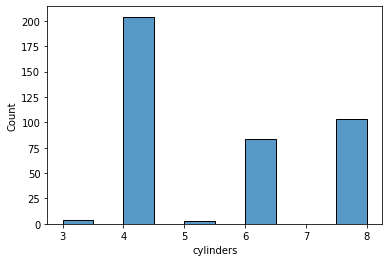

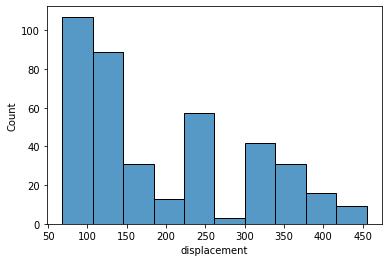

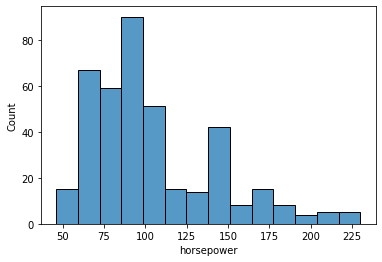

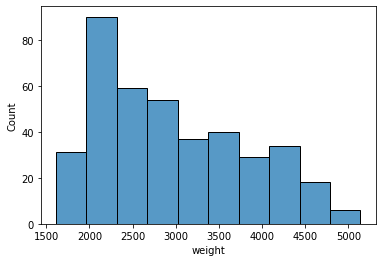

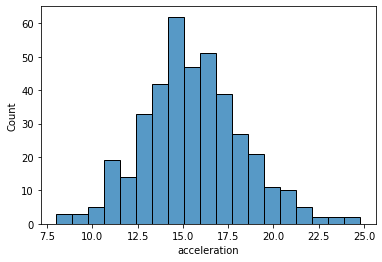

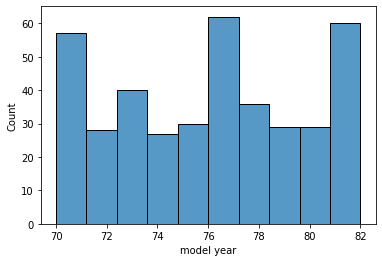

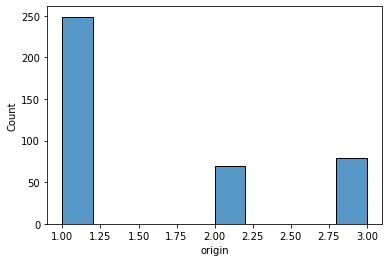

In [34]:
import matplotlib.pyplot as plt   

for i in (X.columns):
  plt.figure()
  sns.histplot(X[i])

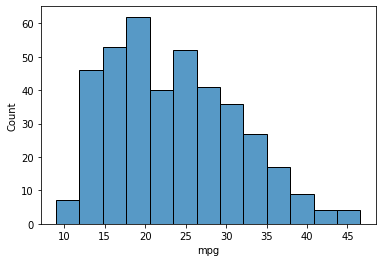

In [35]:
sns.histplot(Y['mpg'])

##### Scaling and train test split

In [36]:
from sklearn import preprocessing


X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

Y_scaled = preprocessing.scale(Y)
Y_scaled = pd.DataFrame(Y_scaled, columns=Y.columns)
X_scaled

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=1)

#### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [41]:

for i, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))


print('\n')

print("The intercept for our model is {}".format(regression_model.intercept_))

The coefficient for cylinders is -0.08561436895562656
The coefficient for displacement is 0.30441822535930174
The coefficient for horsepower is -0.09718466302484224
The coefficient for weight is -0.7628632829136761
The coefficient for acceleration is 0.0215912751729244
The coefficient for model year is 0.37494080741187125
The coefficient for origin is 0.12302637024556859


The intercept for our model is [0.01283313]


#### Regularized Ridge Model

In [42]:
from sklearn.linear_model import Ridge

In [46]:
ridge = Ridge(alpha=0.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,Y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555892:
Ridge model coefficients for displacement is 0.28822207417231593:
Ridge model coefficients for horsepower is -0.09985675156606143:
Ridge model coefficients for weight is -0.7510550916024495:
Ridge model coefficients for acceleration is 0.01912769831483264:
Ridge model coefficients for model year is 0.3737831248958428:
Ridge model coefficients for origin is 0.12212717285800277:


##### Regularized LASSO Model

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314536:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.29198732924913484:
Lasso model coefficients for origin is 0.021567653979880638:


Comparing the scores

In [49]:
print(regression_model.score(X_train, Y_train))
print(regression_model.score(X_test, Y_test))

0.8081802739111359
0.8472274567567306


In [50]:
print(ridge.score(X_train, Y_train))
print(ridge.score(X_test, Y_test))

0.8081651504849107
0.8475401122140553


In [51]:
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.7853770917055521
0.8277658025171161


linear and ridge models accuracy are almost same because both coefficients values are similar while the performance of lasso slightly gone down but used only 5 dimensions while other two used 8 dimensions. This model is feasible compared to other two because dimensions are reduced.



_____